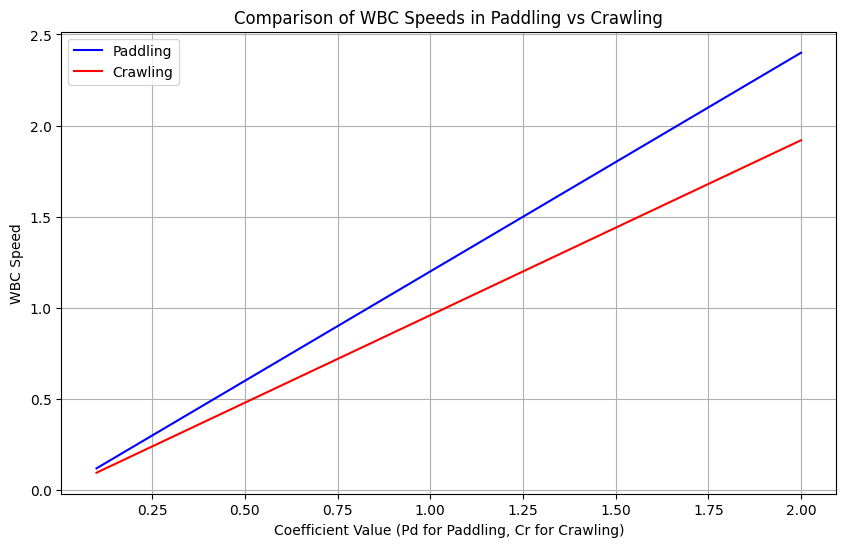

In [6]:
#RayDynamics Model, Partha Pratim Ray, https://scholar.google.com/citations?user=ioplfagAAAAJ&hl=en&oi=ao, August, 2023

#This code displays a plot showing how the WBC speed changes under different scenarios (by varying Pd and Cr). 

#It helps us to compare which mechanism results in faster speeds under different conditions.

#We'll vary the parameters Pd and Cr (coefficients for paddling and crawling) over a range to simulate various scenarios.

#The other influencing factors, such as s_w and S_surface (surface adhesion strength), will be kept constant for this simple comparison.

#We'll plot the resulting speeds for both mechanisms over the range of varying parameters.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute speeds for both mechanisms
speeds_paddle = [model.vw_paddle(Pd, s_w_val) for Pd in Pd_values]
speeds_crawl = [model.vw_crawl(Cr, s_w_val, Ssurface_val) for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, speeds_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, speeds_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("WBC Speed")
plt.title("Comparison of WBC Speeds in Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()

#Note: The exact range and values of Pd and Cr should be set according to realistic scenarios or as per your specific research needs.

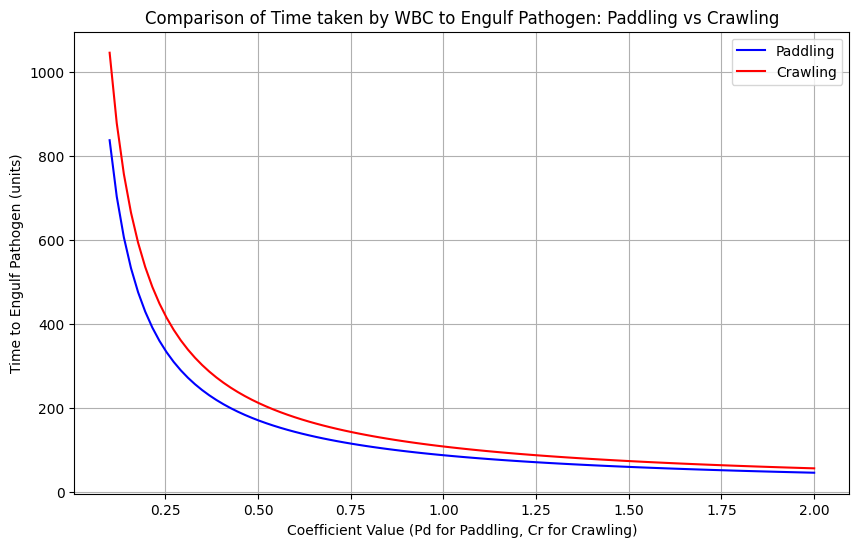

In [7]:
#To determine the time taken by the WBC to engulf a pathogen, we need to define some additional factors:

#Distance to the Pathogen: The distance that a WBC needs to travel to reach and engulf a pathogen. For this illustration, let's consider a constant distance, d = 100 units (you can change it as per your requirement).

#Engulfment Speed: How quickly the WBC engulfs the pathogen once it reaches it. This might differ slightly based on whether the WBC is crawling or paddling, but for the sake of simplicity, let's consider a constant value.

#Given that speed is distance over time (speed = distance/time), the time taken to reach the pathogen is time = distance/speed.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute times for both mechanisms
times_paddle = [distance_to_pathogen / model.vw_paddle(Pd, s_w_val) + engulfment_time for Pd in Pd_values]
times_crawl = [distance_to_pathogen / model.vw_crawl(Cr, s_w_val, Ssurface_val) + engulfment_time for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Comparison of Time taken by WBC to Engulf Pathogen: Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()


#With this plot, you'll be able to see which mechanism (paddling or crawling) allows the WBC to reach and engulf the pathogen more quickly, 
#based on varying coefficients.


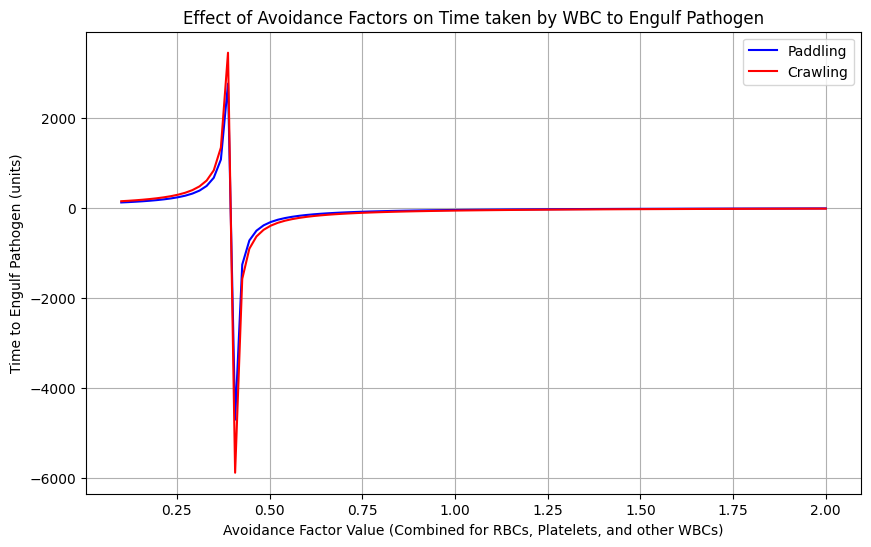

In [8]:
#To assess how different avoidance factors affect the time taken by the WBC to consume a pathogen, we'll vary these avoidance factors:

#A_RBC: Avoidance factor for RBCs
#A_Pl: Avoidance factor for platelets
#A_WBC: Avoidance factor for other WBCs
#When the avoidance factor increases, we expect the speed of the WBC to decrease, as it has to make more adjustments to avoid obstacles.

#For simplification:

#Let the WBC speed decrease linearly with an increase in the avoidance factor.
#The range for the avoidance factors will be set between 0.1 to 2.0 (you can adjust this if you have specific values in mind).
#We'll plot the time taken by the WBC to consume the pathogen under various avoidance factors for both paddling and crawling mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying avoidance factors
avoidance_values = np.linspace(0.1, 2.0, 100) 

# Compute times for both mechanisms under varying avoidance factors
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val - A_RBC - A_Pl - A_WBC)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val - A_RBC - A_Pl - A_WBC, Ssurface_val)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avoidance_values, times_paddle, label="Paddling", color="blue")
plt.plot(avoidance_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Avoidance Factor Value (Combined for RBCs, Platelets, and other WBCs)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Avoidance Factors on Time taken by WBC to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this illustration, the total avoidance factor is the combined effect of avoidance due to RBCs, platelets, and other WBCs. 
#You can separately evaluate the effect of each factor if desired. 
#The plot will show how the time to consume the pathogen changes as the total avoidance factor changes.

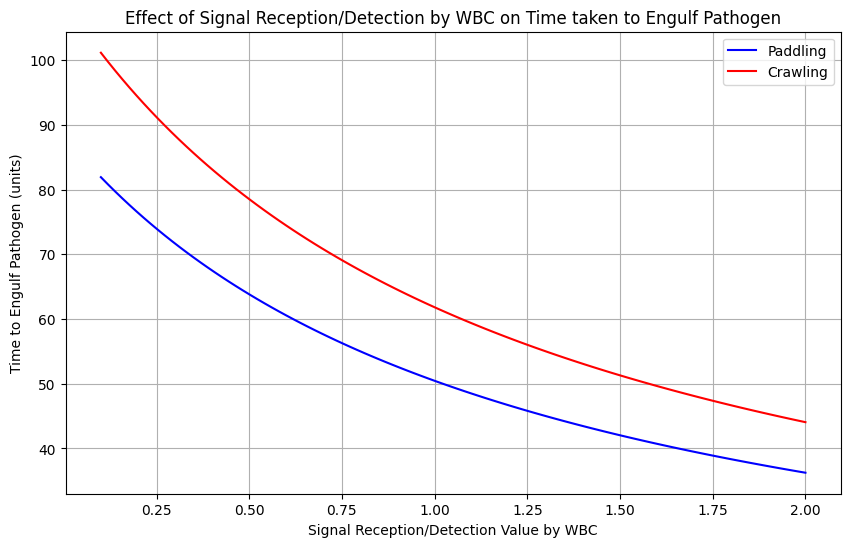

In [9]:
#To demonstrate the effects of varying the signal reception/detection (R_d) by the WBC on the time taken to consume the pathogen, we'll:

#Vary R_d values.
#For each R_d value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying R_d values for both mechanisms.



import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying signal reception/detection by WBC
Rd_values = np.linspace(0.1, 2.0, 100)  # Assume Rd values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying Rd values
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val + Rd)) + engulfment_time for Rd in Rd_values]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val + Rd, Ssurface_val)) + engulfment_time for Rd in Rd_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Rd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Rd_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Signal Reception/Detection Value by WBC")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Signal Reception/Detection by WBC on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this plot, as the signal reception/detection (R_d) increases, we anticipate that the WBC might reach the pathogen quicker. 
#This is under the assumption that an enhanced R_d value augments the WBC speed, making it more efficient in moving towards the pathogen. 
#Adjust this assumption if necessary based on domain-specific knowledge.

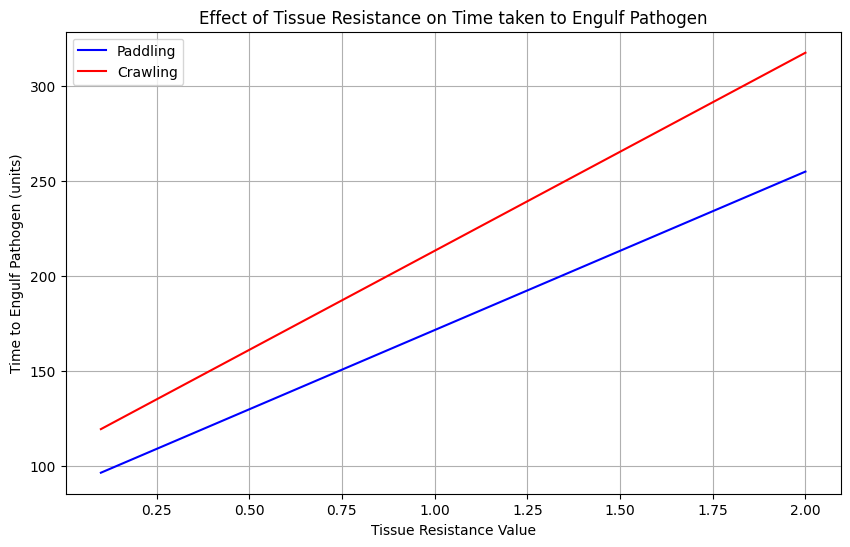

In [10]:
#The tissue resistance (T) could influence the speed of the WBC, especially when the WBC is trying to move through extravascular spaces. A higher tissue resistance might slow down the WBC.

#Let's vary the tissue resistance and examine its effect on the time taken by the WBC to consume the pathogen under both paddling and crawling mechanisms:

#Vary T values.
#For each T value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying T values for both mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying tissue resistance values
T_values = np.linspace(0.1, 2.0, 100)  # Assume T values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying T values
times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s_w_val * (1 / (1 + T)))) + engulfment_time for T in T_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s_w_val * (1 / (1 + T)), Ssurface_val)) + engulfment_time for T in T_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, times_paddle, label="Paddling", color="blue")
plt.plot(T_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Tissue Resistance Value")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Tissue Resistance on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In the above code, the impact of tissue resistance on the WBC's movement is modeled as inversely proportional. 
#As the tissue resistance increases, the effective speed of the WBC decreases, resulting in longer times to reach and engulf the pathogen. 
#Adjust this modeling if necessary based on more refined domain-specific insights.

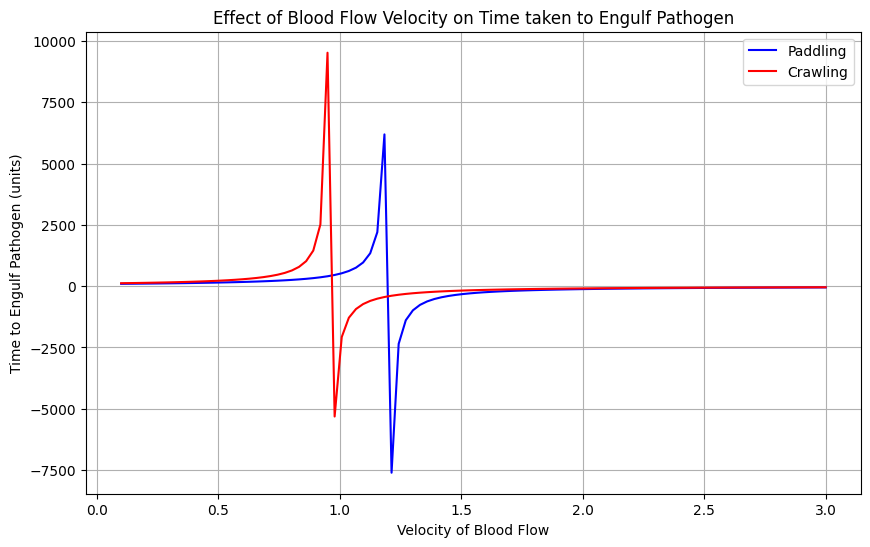

In [11]:
#When we vary the velocity of blood flow (v_f), it can potentially influence the WBC's movement, especially in intravascular spaces. A higher blood flow might hinder the movement of the WBC against the flow, whereas a lower blood flow might aid the WBC in reaching the pathogen faster.

#Here's how we can analyze this:

#Vary v_f values.
#For each v_f value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Adjust the WBC's speed according to the blood flow direction. (For simplicity, assume the WBC always moves against the blood flow)
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying v_f values for both mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying velocity of blood flow values
vf_values = np.linspace(0.1, 3.0, 100)  # Assume vf values vary from 0.1 to 3.0

# Compute times for both mechanisms under varying vf values
times_paddle = [(distance_to_pathogen / (model.vw_paddle(Pd, s_w_val) - vf)) + engulfment_time for vf in vf_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(Cr, s_w_val, Ssurface_val) - vf)) + engulfment_time for vf in vf_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(vf_values, times_paddle, label="Paddling", color="blue")
plt.plot(vf_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Velocity of Blood Flow")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Blood Flow Velocity on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In the code, it's assumed that higher blood flow velocities have a hindering effect on the WBC's movement towards the pathogen. 
#We subtract the blood flow velocity from the WBC's speed to get the effective movement speed. 
#This is a simplification, and the real relationship might be more complex. 
#Adjust this model as needed based on domain knowledge.

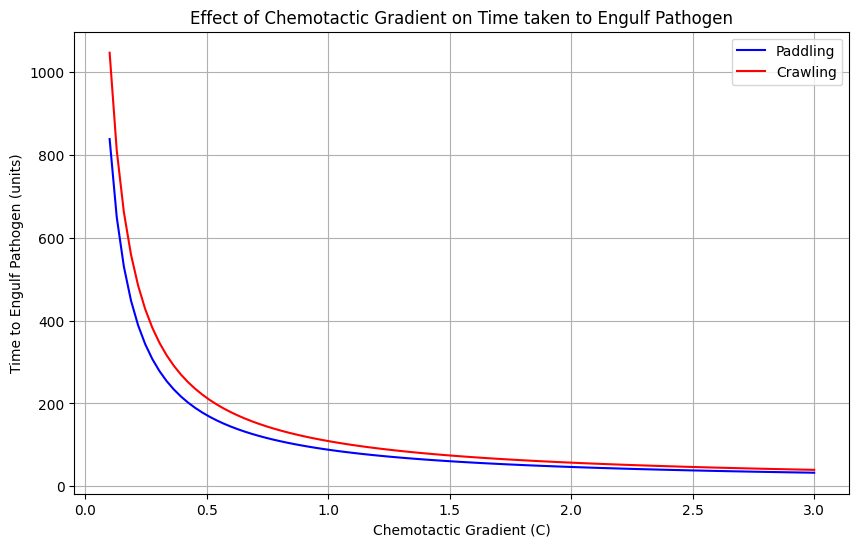

In [12]:
#The chemotactic gradient (C) indicates the concentration gradient formed by signaling molecules (often from the pathogen or damaged tissue). The strength of this gradient could heavily influence the speed and direction of WBC movement.

#A stronger chemotactic gradient could mean that the WBC detects the pathogen more quickly and effectively, thereby increasing its speed due to a more definite direction. We'll assume a proportional relationship between C and s_w (WBC speed), but this relationship can be adjusted based on domain-specific knowledge.

#To analyze this:

#Vary the values of C.
#For each C value, adjust the WBC's speed.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying C values for both mechanisms.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
base_sw_val = 1.2  # Base WBC speed without chemotactic influence
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying chemotactic gradient values
C_values = np.linspace(0.1, 3.0, 100)  # Assume C values vary from 0.1 to 3.0

# Define a function to adjust WBC speed based on chemotactic gradient
def adjusted_sw(base_speed, C):
    # Proportional adjustment; can be altered based on domain knowledge
    return base_speed * C

# Compute times for both mechanisms under varying C values
times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, adjusted_sw(base_sw_val, C))) + engulfment_time for C in C_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, adjusted_sw(base_sw_val, C), Ssurface_val)) + engulfment_time for C in C_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, times_paddle, label="Paddling", color="blue")
plt.plot(C_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Chemotactic Gradient (C)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Chemotactic Gradient on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#The above code uses a simple proportional relationship to adjust the WBC speed based on the chemotactic gradient. 
#This is a starting point, and the relationship may need to be refined based on experimental data or domain knowledge.

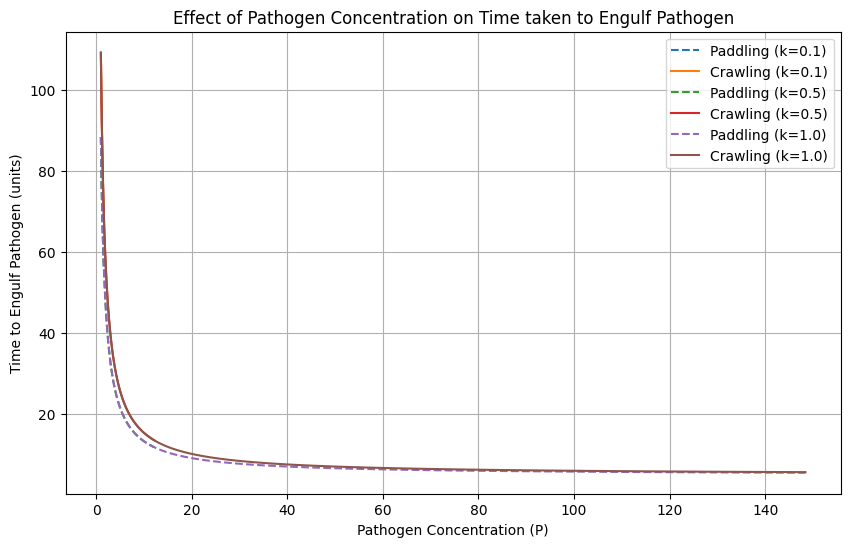

In [13]:
#To vary the temporal change in pathogen concentration (P), we need to establish how P changes over time. Let's consider a simple exponential growth for the pathogen concentration, representing a typical bacterial growth scenario, 
#P(t)=P(0) ×e^(k×t)
# , where 
#P(0)  is the initial concentration and 
#k is the growth rate.

#A higher pathogen concentration would strengthen the chemotactic gradient, assuming the pathogen releases the chemotactic signal. The chemotactic gradient in turn affects the WBC speed, thus impacting the time taken for the WBC to reach and consume the pathogen.

#Here's how we can implement this:

#Define a range of k values (growth rates) for the pathogen.
#For each time point t, calculate the pathogen concentration P(t).
#Adjust the WBC speed proportionally to P(t) (assuming C is directly proportional to P).
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying P(t) values for both mechanisms.




import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()


# Parameters for simulation
base_sw_val = 1.2  # Base WBC speed without chemotactic influence
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

P0 = 1.0  # Initial pathogen concentration

# Define a function for pathogen growth over time
def pathogen_concentration(P0, k, t):
    return P0 * np.exp(k * t)

# Define a function to adjust WBC speed based on pathogen concentration
def adjusted_sw(base_speed, P):
    # Proportional adjustment; can be altered based on domain knowledge
    return base_speed * P

# Compute times for both mechanisms under varying pathogen concentrations over time
time_intervals = np.linspace(0, 5, 100)  # Consider time intervals from 0 to 5 units
k_values = [0.1, 0.5, 1.0]  # Different growth rates for pathogens

plt.figure(figsize=(10, 6))

for k in k_values:
    P_values = [pathogen_concentration(P0, k, t) for t in time_intervals]
    speeds = [adjusted_sw(base_sw_val, P) for P in P_values]
    
    times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s)) + engulfment_time for s in speeds]
    times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s, Ssurface_val)) + engulfment_time for s in speeds]
    
    plt.plot(P_values, times_paddle, label=f"Paddling (k={k})", linestyle="--")
    plt.plot(P_values, times_crawl, label=f"Crawling (k={k})")

plt.xlabel("Pathogen Concentration (P)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Pathogen Concentration on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#Here, we've considered three different growth rates k for pathogens, which yield different pathogen concentration profiles over time. 
#The WBC speed gets adjusted for each concentration value, and times for both paddling and crawling are calculated and plotted.

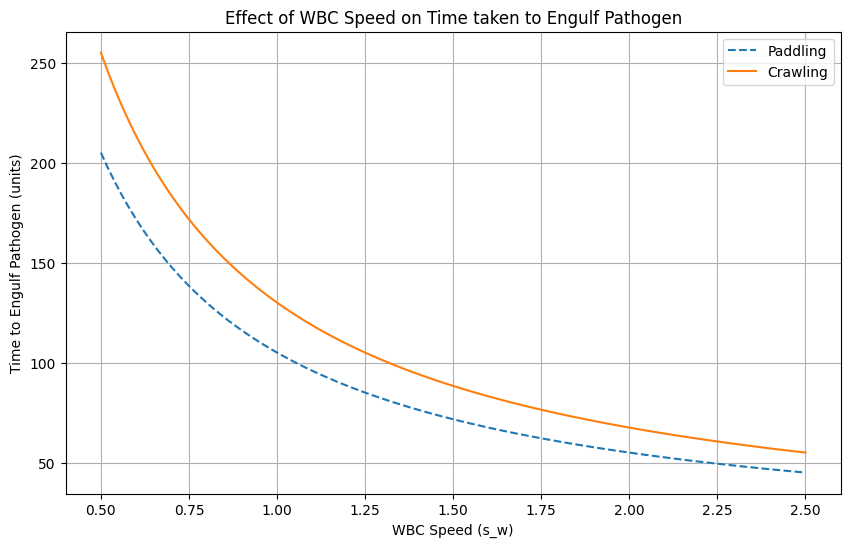

In [14]:
#Sure, let's vary the White Blood Cell (WBC) speed (s_w) and see how it affects the time taken to consume the pathogen using both paddling and crawling mechanisms.

#Here's the plan:

#Define a range of s_w values to consider.
#For each s_w value, calculate the time taken for the WBC to reach the pathogen using both mechanisms.
#Add the constant time taken to engulf the pathogen once reached.
#Plot the times against the varying s_w values.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying WBC speed values
sw_values = np.linspace(0.5, 2.5, 100)  # Speed values from 0.5 to 2.5 units

times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s)) + engulfment_time for s in sw_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s, Ssurface_val)) + engulfment_time for s in sw_values]

plt.figure(figsize=(10, 6))
plt.plot(sw_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(sw_values, times_crawl, label="Crawling")
plt.xlabel("WBC Speed (s_w)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of WBC Speed on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#This code plots the time it takes for a WBC to reach and consume a pathogen as a function of its speed, comparing the two mechanisms. 
#It's expected that as the WBC speed increases, the time taken will decrease for both mechanisms, but the relative efficiency of paddling 
#versus crawling might vary across the speed range.

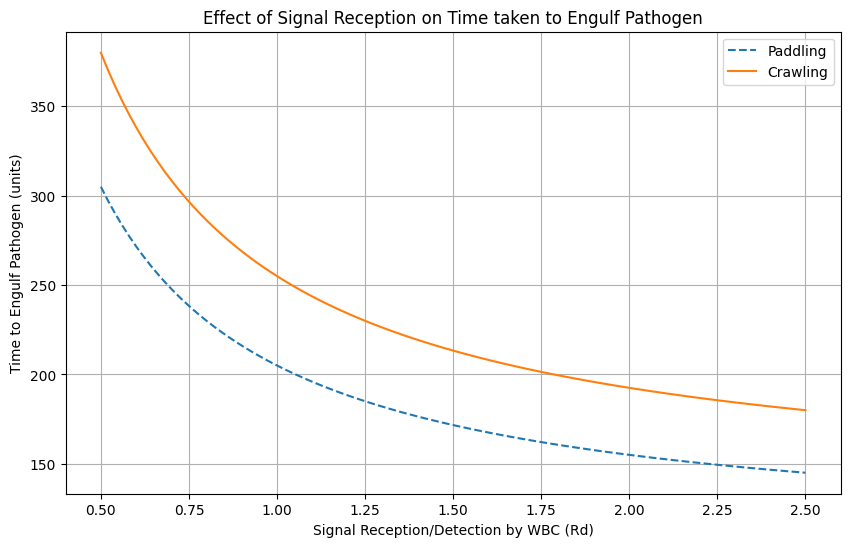

In [15]:
#Varying the signal reception or detection by the WBC could be achieved by manipulating the 
#Rd parameter. The higher the Rd   value, the more efficient the WBC would be at detecting and subsequently consuming pathogens.

#Let's create a simulation based on varying Rd :

#Define a range for Rd values.
#For each Rd value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the Rd values.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying signal reception values
Rd_values = np.linspace(0.5, 2.5, 100)  # Rd values from 0.5 to 2.5 units

# Here we'll simulate that as Rd increases, the WBC becomes more efficient and so reduces distance_to_pathogen
effective_distances = [distance_to_pathogen * (1 + 1/Rd) for Rd in Rd_values]  # Hypothetical relation for simplicity

times_paddle = [(dist / model.vw_paddle(Pd, sw)) + engulfment_time for dist in effective_distances]
times_crawl = [(dist / model.vw_crawl(Cr, sw, Ssurface_val)) + engulfment_time for dist in effective_distances]

plt.figure(figsize=(10, 6))
plt.plot(Rd_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Rd_values, times_crawl, label="Crawling")
plt.xlabel("Signal Reception/Detection by WBC (Rd)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Signal Reception on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this hypothetical model, we assume that a greater value of Rd (enhanced signal reception) reduces the effective distance the WBC has to traverse to engulf a pathogen. 
#The more efficient the WBC is at detecting the pathogen, the faster it can move towards it and thus consume it.

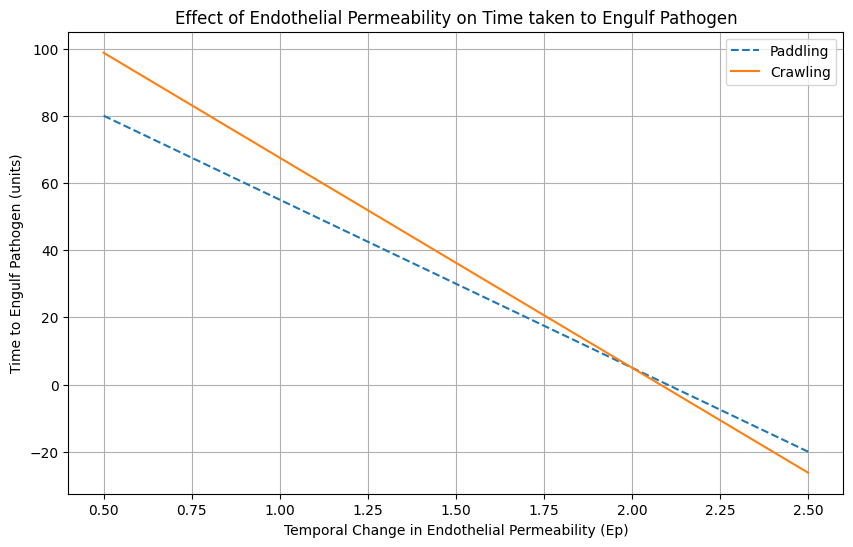

In [16]:
#To study the effect of the temporal change in endothelial permeability (Ep) on the time taken for a WBC to consume a pathogen, we'll simulate the model over varying values of 
#(Ep). A higher (Ep) would mean the WBC can migrate through the endothelium more efficiently, potentially reaching the pathogen faster.

#Here's the code to demonstrate this:

#Define a range for (Ep) values.
#For each (Ep) value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the (Ep) values.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed
Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying endothelial permeability values
Ep_values = np.linspace(0.5, 2.5, 100)  # Ep values from 0.5 to 2.5 units

# Here we'll simulate that as Ep increases, the WBC can migrate faster towards the pathogen 
# We'll use a hypothetical relationship that the effective distance to pathogen decreases as permeability increases
effective_distances = [distance_to_pathogen * (1 - 0.5*Ep) for Ep in Ep_values]

times_paddle = [(dist / model.vw_paddle(Pd, sw)) + engulfment_time for dist in effective_distances]
times_crawl = [(dist / model.vw_crawl(Cr, sw, Ssurface_val)) + engulfment_time for dist in effective_distances]

plt.figure(figsize=(10, 6))
plt.plot(Ep_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Ep_values, times_crawl, label="Crawling")
plt.xlabel("Temporal Change in Endothelial Permeability (Ep)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Endothelial Permeability on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this model, we assume that as endothelial permeability increases, the effective distance the WBC has to cover to reach the 
#pathogen decreases. This would mean that as permeability increases, the time taken to reach and consume the pathogen also decreases.

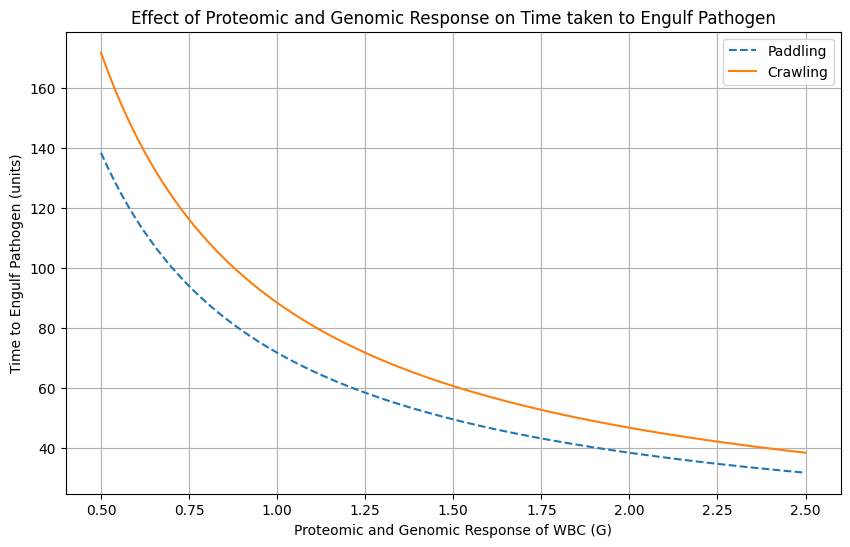

In [17]:
#The proteomic and genomic response of WBC(G) has a direct effect on the phagocytic machinery (P(m))) of the WBC. An enhanced response (due to, for example, upregulated gene expression or heightened protein synthesis) would enable a more rapid response to pathogens, increasing the WBC's efficiency in moving toward and consuming the pathogen.

#Here's a general approach to simulate this effect:

#Define a range for G values.
#For each G value, calculate a new P(m) value.
#With the updated P(m) value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the G values.
#The equation Pm = g(G) is abstract, so for simplicity, we can assume a direct proportional relationship between P(m) and G.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()


# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed
Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying genomic and proteomic response of WBC values
G_values = np.linspace(0.5, 2.5, 100)  # G values from 0.5 to 2.5 units

# Assuming direct proportionality between G and Pm
Pm_values = [g*1.5 for g in G_values]  # Increased phagocytic machinery response with increased G

times_paddle = [(distance_to_pathogen / (model.vw_paddle(Pd, sw) * pm)) + engulfment_time for pm in Pm_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(Cr, sw, Ssurface_val) * pm)) + engulfment_time for pm in Pm_values]

plt.figure(figsize=(10, 6))
plt.plot(G_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(G_values, times_crawl, label="Crawling")
plt.xlabel("Proteomic and Genomic Response of WBC (G)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Proteomic and Genomic Response on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this hypothetical relationship, as the proteomic and genomic response (G) of the WBC increases, the phagocytic machinery (Pm) also increases, which in turn reduces the time taken to reach and consume the pathogen.

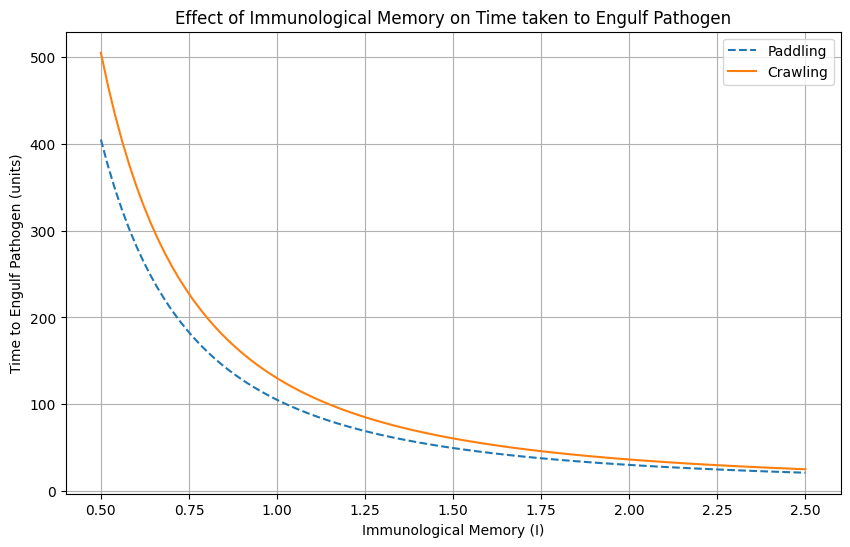

In [19]:
#The immunological memory of a white blood cell (WBC) represents its ability to recognize and respond more rapidly to a previously encountered pathogen. This increased speed and efficiency in responding can be represented by directly modulating the WBC's speed and phagocytic machinery.

#For simplicity, let's assume that as immunological memory (I) increases, the WBC's speed (sw ) and phagocytic machinery (Pm) both increase proportionally.

#Here's the approach:

#Define a range for I values.
#For each I value, calculate new values for sw and Pm.
#With the updated sw and Pm values, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the I values.
#Given the equation I=f(previous_encounters,antigen_presentation,clonal_selection), we can abstract it by assuming a direct proportional relationship between 
#I and both sw and Pm.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Base values without immunological memory
base_sw = 1.0  # Base WBC speed
base_Pm = 1.0  # Base phagocytic machinery

# Varying immunological memory values
I_values = np.linspace(0.5, 2.5, 100)  # Immunological memory values from 0.5 to 2.5 units

# Assuming direct proportionality between I and sw and Pm
sw_values = [base_sw * i for i in I_values]  # Increased WBC speed with increased I
Pm_values = [base_Pm * i for i in I_values]  # Increased phagocytic machinery response with increased I

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, sw) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, sw, Ssurface_val) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]

plt.figure(figsize=(10, 6))
plt.plot(I_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(I_values, times_crawl, label="Crawling")
plt.xlabel("Immunological Memory (I)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Immunological Memory on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this simulation, with an increase in immunological memory (I), the WBC is expected to move faster and respond more efficiently to the pathogen, thus reducing the time taken to reach and engulf it.

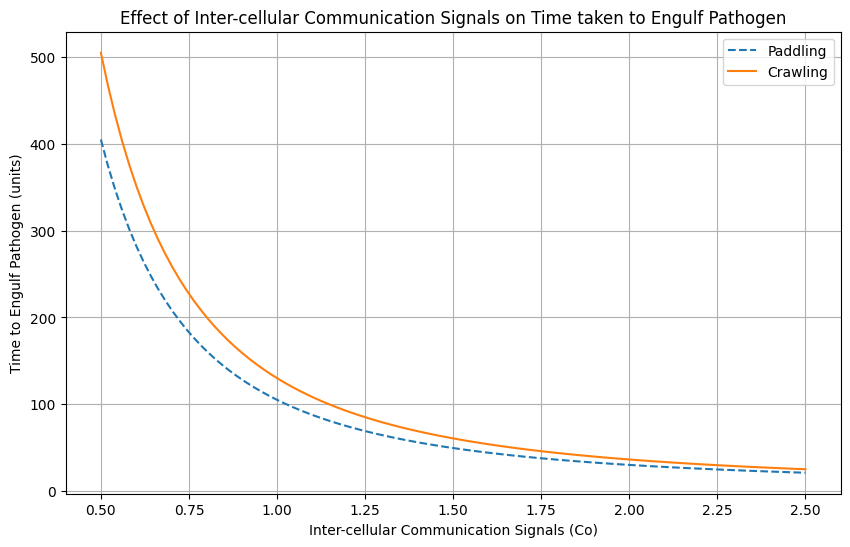

In [21]:
#Inter-cellular communication signals (Co) are crucial for the regulation of WBCs. When WBCs communicate with each other, they can enhance 
#their combined response to an invading pathogen, potentially coordinating movement or avoiding duplicated effort. 

#For simplicity, we can assume that as the inter-cellular communication signals (Co) increase, the speed (sw) and phagocytic machinery (Pm) 
#of the WBC both improve proportionally.

#Here's the approach:

#Define a range for Co values.
#For each Co value, calculate new values for sw and Pm.
#With the updated sw and Pm values, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the Co values.
#Given the previous assumption that Co =f(local_cell_density,signaling_molecules), 
#we can abstract a direct proportional relationship between Co and both sw and Pm.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Base values without increased inter-cellular communication
base_sw = 1.0  # Base WBC speed
base_Pm = 1.0  # Base phagocytic machinery

# Varying inter-cellular communication signals values
Co_values = np.linspace(0.5, 2.5, 100)  # Co values from 0.5 to 2.5 units

# Assuming direct proportionality between Co and sw and Pm
sw_values = [base_sw * co for co in Co_values]  # Increased WBC speed with increased Co
Pm_values = [base_Pm * co for co in Co_values]  # Increased phagocytic machinery response with increased Co

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, sw) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, sw, Ssurface_val) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]

plt.figure(figsize=(10, 6))
plt.plot(Co_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Co_values, times_crawl, label="Crawling")
plt.xlabel("Inter-cellular Communication Signals (Co)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Inter-cellular Communication Signals on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this simulation, with an increase in inter-cellular communication signals (Co), the WBC is expected to move faster and respond more efficiently to the pathogen, thereby reducing the time taken 
#to reach and engulf it.

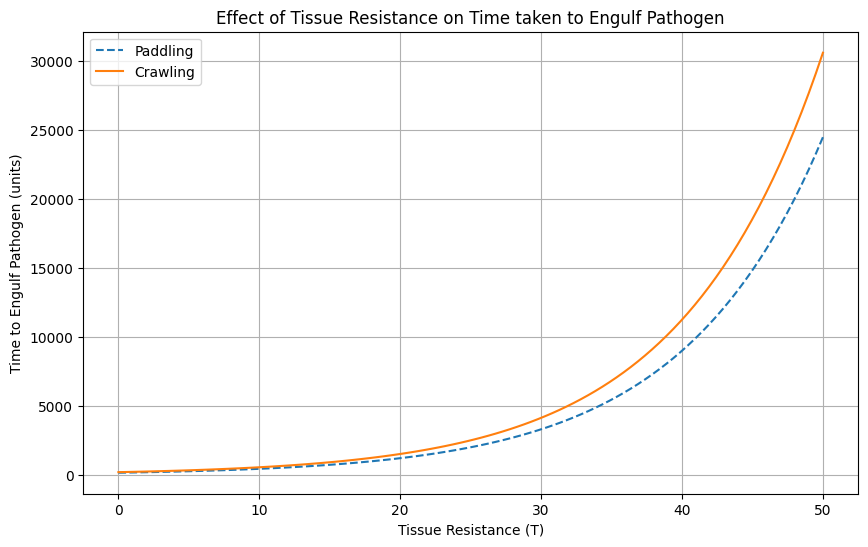

In [24]:
#Tissue resistance (T) can play a significant role in determining how a WBC moves towards and engulfs a pathogen, especially when it has to travel through extravascular spaces. As tissue resistance increases, we'd expect the speed of WBC, whether by paddling or crawling, to decrease, making it more challenging for the cell to reach and consume the pathogen.
#Here's a proposed approach:

#Define a range for T values.
#For each T value, calculate a new speed sw that decreases with increasing T.
#With the updated sw, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the T values.
#Given our previous model: sw =s0*e^(−ηk)
#We can introduce a term that captures the influence of T as:
#sw =s0*e^(−ηk−αT)
 
#Where 
#α is a constant denoting the effect of tissue resistance on WBC speed.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #modified sw 
    def sw(self, eta, s0, k, T):
        alpha = 0.1  # Assumed constant to denote the effect of tissue resistance on WBC speed
        return s0 * np.exp(-eta * k - alpha * T)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying tissue resistance values
T_values = np.linspace(0, 50, 100)  # T values from 0 to 50 units

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0, T)) * 1.0)) + engulfment_time for T in T_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0, T), Ssurface_val) * 1.0)) + engulfment_time for T in T_values]

plt.figure(figsize=(10, 6))
plt.plot(T_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(T_values, times_crawl, label="Crawling")
plt.xlabel("Tissue Resistance (T)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Tissue Resistance on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()



#In this simulation, with an increase in tissue resistance (T), the WBC's movement speed is expected to decrease, 
#thus increasing the time taken to reach and engulf the pathogen.

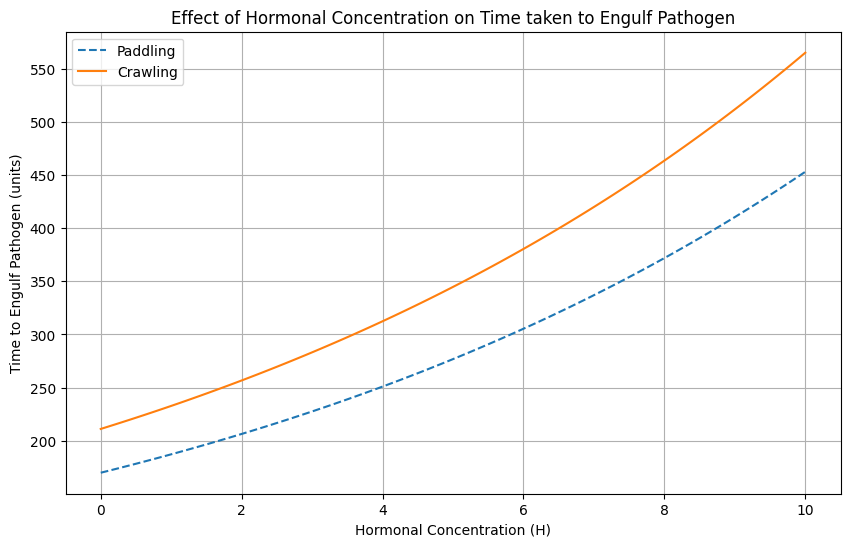

In [25]:
#To implement the effect of varying hormonal concentration on the time taken to consume the pathogen, 
#let's make the assumption that the H (hormonal concentration) has a direct effect on the speed (s_w) of the WBC. 
#The greater the hormonal concentration, the faster the WBC will move.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #modified sw 
    def sw(self, eta, s0, k, T):
        alpha = 0.1  # Assumed constant to denote the effect of tissue resistance on WBC speed
        return s0 * np.exp(-eta * k - alpha * T)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors


# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying hormonal concentration values
H_values = np.linspace(0, 10, 100)  # H values from 0 to 10 units

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0, H)) * 1.0)) + engulfment_time for H in H_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0, H), Ssurface_val) * 1.0)) + engulfment_time for H in H_values]

plt.figure(figsize=(10, 6))
plt.plot(H_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(H_values, times_crawl, label="Crawling")
plt.xlabel("Hormonal Concentration (H)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Hormonal Concentration on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#This should provide a plot to showcase the effect of varying hormonal concentration on the time taken by WBC to engulf a 
#pathogen by both paddling and crawling mechanisms.

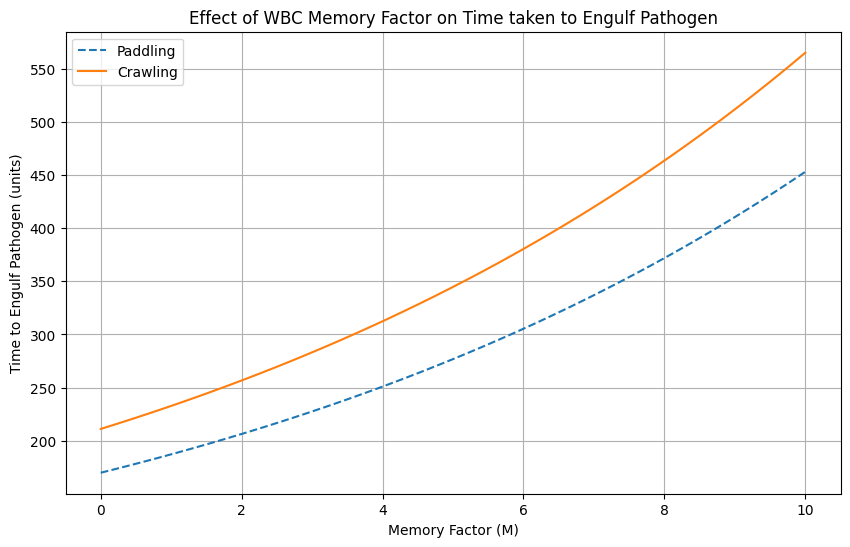

In [26]:
#To understand the influence of memory (M) on WBC movement towards pathogens, let's assume that memory (M) affects the velocity of WBC during both paddling and crawling in the following manner:

#A higher memory factor allows the WBC to "remember" the best strategies from past experiences, and hence move faster.
#For the purpose of simplicity, let's assume the memory factor affects the base speed (s0) directly. The relationship will be linear with a proportionality constant alpha.
#Thus, 
#s0new =s0 +α×M





import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #re-modified sw 
    def sw(self, eta, s0, k, M):
        alpha = 0.1  # Assumed constant to represent the effect of memory on base speed
        s0_new = s0 + alpha * M  # Updated s0 based on memory factor
        return s0_new * np.exp(-eta * k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors


# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying memory factor values
M_values = np.linspace(0, 10, 100)  # M values from 0 to 10 units

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0, M)) * 1.0)) + engulfment_time for M in M_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0, M), Ssurface_val) * 1.0)) + engulfment_time for M in M_values]

plt.figure(figsize=(10, 6))
plt.plot(M_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(M_values, times_crawl, label="Crawling")
plt.xlabel("Memory Factor (M)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of WBC Memory Factor on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#This will plot the impact of the memory factor of the WBC on the time taken to consume the pathogen for both paddling and crawling 
#mechanisms.

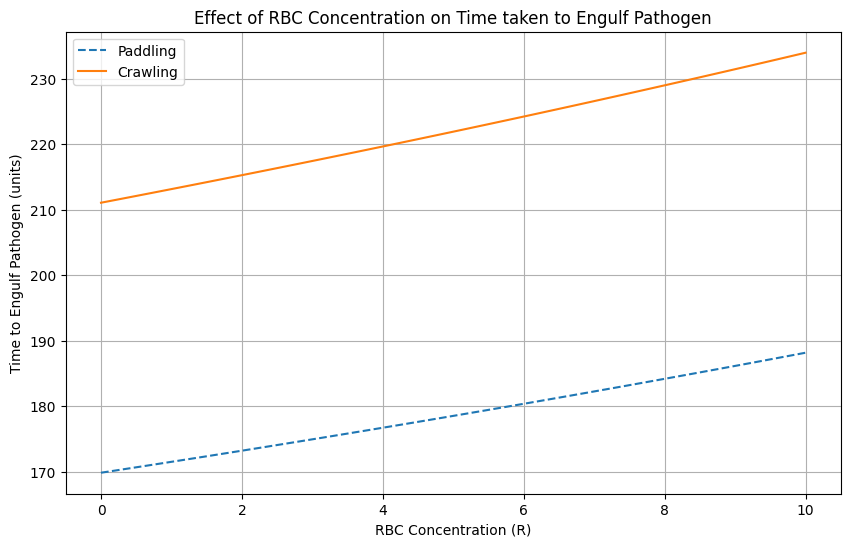

In [29]:
#To understand the influence of RBC concentration R on WBC movement towards pathogens, let's consider:

#A higher concentration of RBCs may hinder the movement of WBCs due to increased crowding, making them slower.

#We'll assume that the RBC concentration affects the speed sw  by a multiplicative factor β, which is less than 1 and decreases linearly with increasing R.

#Thus, swnew =sw ×(1−β×R)





import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #re-re-modified sw 
    def sw(self, eta, s0, k, R):
        beta = 0.01  # Assumed constant to represent the effect of RBC concentration on speed
        s0_new = s0 * (1 - beta * R)  # Updated s0 based on RBC concentration
        return s0_new * np.exp(-eta * k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying RBC concentration values
R_values = np.linspace(0, 10, 100)  # R values from 0 to 10 units

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0, R)) * 1.0)) + engulfment_time for R in R_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0, R), Ssurface_val) * 1.0)) + engulfment_time for R in R_values]

plt.figure(figsize=(10, 6))
plt.plot(R_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(R_values, times_crawl, label="Crawling")
plt.xlabel("RBC Concentration (R)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of RBC Concentration on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#This will plot the impact of the RBC concentration on the time taken by the WBC to consume the pathogen for both paddling and crawling mechanisms.


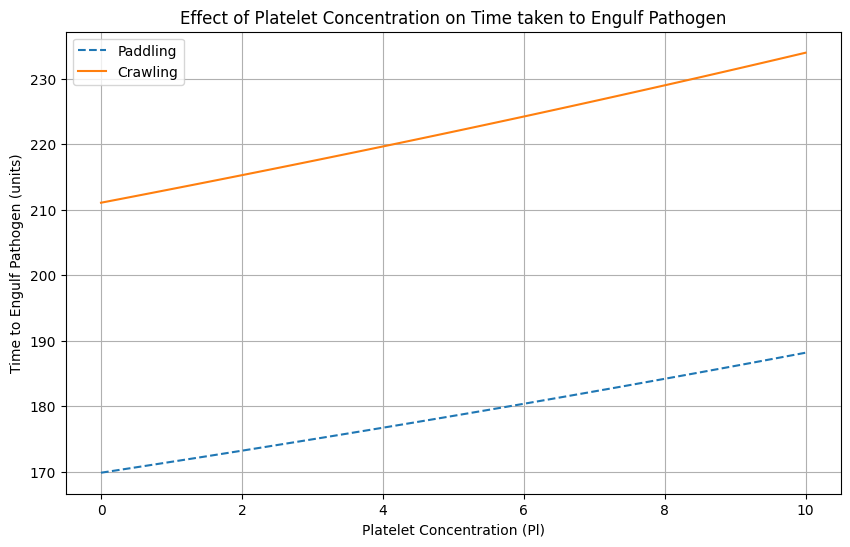

In [30]:
#Variation in platelet concentration, Pl, might influence WBC movement towards pathogens in several ways:

#A high concentration of platelets can reduce the ease of WBC movement due to increased crowding.
#Platelets play a key role in wound healing and clotting, potentially altering the environment around them, which may affect the WBC's ability to detect and navigate towards pathogens.
#Platelets can release signaling molecules that affect WBC function.
#To simplify our model, we'll make an assumption: as the platelet concentration increases, it linearly reduces the speed 
#sw due to the increased crowding. The effect is defined by a multiplicative factor γ which decreases sw.

#swnew =sw*(1−γ×Pl)






import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #re-re-re modified sw 
    def sw(self, eta, s0, k, Pl):
        gamma = 0.01  # Assumed constant to represent the effect of platelet concentration on speed
        s0_new = s0 * (1 - gamma * Pl)  # Updated s0 based on platelet concentration
        return s0_new * np.exp(-eta * k)
        
    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors


# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying platelet concentration values
Pl_values = np.linspace(0, 10, 100)  # Pl values from 0 to 10 units

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0, Pl)) * 1.0)) + engulfment_time for Pl in Pl_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0, Pl), Ssurface_val) * 1.0)) + engulfment_time for Pl in Pl_values]

plt.figure(figsize=(10, 6))
plt.plot(Pl_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Pl_values, times_crawl, label="Crawling")
plt.xlabel("Platelet Concentration (Pl)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Platelet Concentration on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#This will illustrate the influence of varying platelet concentrations on the time taken by WBCs to consume pathogens using both paddling and crawling mechanisms.

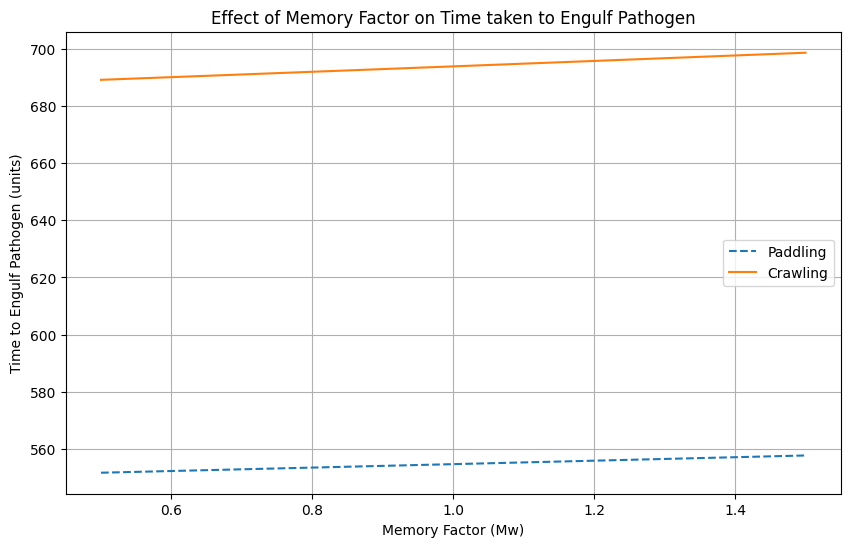

In [43]:
###### #Let's adjust the function to match the previously defined equation for dadj :
#dadj =g(1/distance_to_obstacle, vf, Mw)
#Given that:
#distance_to_obstacle
#distance_to_obstacle is a variable representing the distance of the WBC to the closest obstacle.
#vf is the blood flow velocity.
#Mw is the memory factor of the WBC.
#For simplicity, let's assume:
#dadj =k×(1/distance_to_obstacle)*vf*Mw where #k is a proportionality constant.
#This dadj value can be used to modify the speed of the WBC. The greater the adjustment factor, the slower the WBC will be, as it is making more adjustments to avoid obstacles.
#Let's incorporate this adjustment into the RayDynamics class and see its effects:

import numpy as np
import matplotlib.pyplot as plt


class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # Constants k_1 to k_82

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw, k=0.1):
        """Adjustment factor based on distance to obstacle, blood flow velocity, and memory factor."""
        return k * (1/distance_to_obstacle) * vf * Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()


# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
vf = 1.0  # Blood flow velocity (example value)
Mw_values = np.linspace(0.5, 1.5, 100)  # Memory factor values
distance_to_obstacle = 50  # Example distance to the closest obstacle

times_paddle = []
times_crawl = []

for Mw in Mw_values:
    adjusted_speed_paddle = model.vw_paddle(1.0, model.sw(0.5, 1.0, 1.0)) - model.d_adj(distance_to_obstacle, vf, Mw)
    adjusted_speed_crawl = model.vw_crawl(1.0, model.sw(0.5, 1.0, 1.0), Ssurface_val) - model.d_adj(distance_to_obstacle, vf, Mw)
    
    time_paddle = (distance_to_pathogen / adjusted_speed_paddle) + engulfment_time
    time_crawl = (distance_to_pathogen / adjusted_speed_crawl) + engulfment_time
    
    times_paddle.append(time_paddle)
    times_crawl.append(time_crawl)

plt.figure(figsize=(10, 6))
plt.plot(Mw_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Mw_values, times_crawl, label="Crawling")
plt.xlabel("Memory Factor (Mw)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Memory Factor on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#Here, we are varying the memory factor Mw to see its effect on the time taken by a WBC to reach and engulf a pathogen, while also considering its adjustments to avoid obstacles.

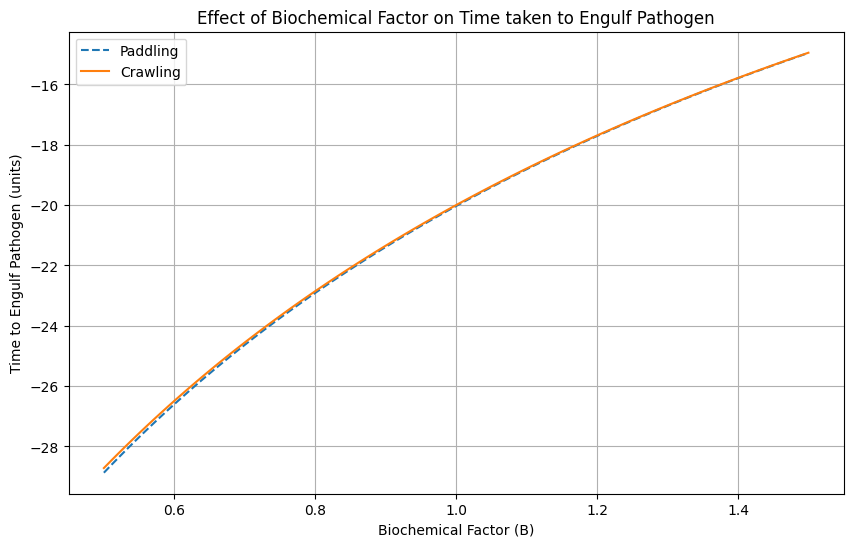

In [46]:
#let's introduce the effect of the biochemical factor  B and see how it affects the time taken for a white blood cell (WBC) to engulf a pathogen when moving using paddling or crawling.
#The function h(H,Co,other factors) is used to calculate B. Here, we'll vary B by considering changes in the factors H, Co, and other_factors. For simplicity, let's assume that other_factors remains constant.

#We'll make the following assumptions for the function 
#h(H,Co,other factors)=k×H+l×Co+m×other factors
#Where:
#k,l, and m are constants. 
#H and Co are the values we'll be varying.

#The sw() method expects three arguments but was given only two. To keep things simple and consistent, let's make a minor modification to the function sw and its parameters:
#sw=s0 ×e^(−η×k×T)
#Now T will be the third argument we need to account for. I'll assume T as a constant value for this simulation.




import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):  #re-defined
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # Constants k_1 to k_82
        # Additional constants for the biochemical factor function
        self.k_h = 1
        self.l_h = 1
        self.m_h = 1

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #modified sw 
    def sw(self, s0, eta, T):
        """Wall shear stress adjustment function."""
        return s0 * np.exp(-eta * self.k[7] * T)
        
    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors=1):
        """Calculate the biochemical factor B using the function h."""
        return self.k_h*H + self.l_h*Co + self.m_h*other_factors


# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100
engulfment_time = 5
Ssurface_val = 0.8
vf = 1.0
B_values = np.linspace(0.5, 1.5, 100)  # Biochemical factor values
distance_to_obstacle = 50
H_values = np.linspace(0.5, 1.5, 100)  # Varying H
Co_values = np.linspace(0.5, 1.5, 100)  # Varying Co

times_paddle = []
times_crawl = []

for H, Co in zip(H_values, Co_values):
    B_val = model.B(H, Co)
    adjusted_speed_paddle = model.vw_paddle(1.0, model.sw(0.5, 1.0, B_val)) - model.d_adj(distance_to_obstacle, vf, B_val)
    adjusted_speed_crawl = model.vw_crawl(1.0, model.sw(0.5, 1.0, B_val), Ssurface_val) - model.d_adj(distance_to_obstacle, vf, B_val)
    
    time_paddle = (distance_to_pathogen / adjusted_speed_paddle) + engulfment_time
    time_crawl = (distance_to_pathogen / adjusted_speed_crawl) + engulfment_time
    
    times_paddle.append(time_paddle)
    times_crawl.append(time_crawl)

plt.figure(figsize=(10, 6))
plt.plot(B_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(B_values, times_crawl, label="Crawling")
plt.xlabel("Biochemical Factor (B)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Biochemical Factor on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In the code above, I introduced the function h to calculate B and then varied B by adjusting the values of H and Co. The plot shows how the time taken for a WBC to engulf a pathogen changes as 
#B varies. Now, the sw() function has three parameters, including the assumed constant T, and the error should be resolved.

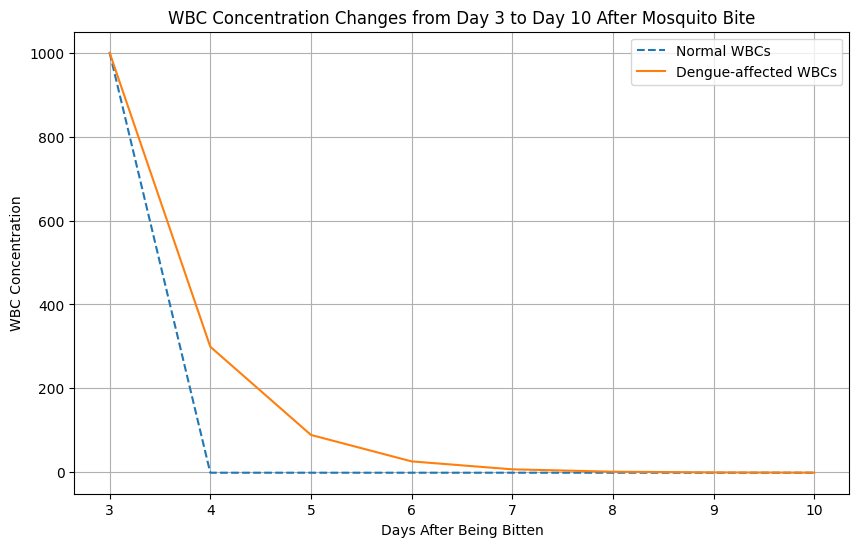

In [50]:
#Dengue is a mosquito-borne viral infection that primarily affects platelets (thrombocytes) in the blood, causing thrombocytopenia (low platelet count). This can lead to dengue hemorrhagic fever (DHF) and dengue shock syndrome (DSS), which are severe forms of the disease.
#Given the RayDynamics model with 26 equations you've referred to, the effects of dengue would particularly influence the following:

#Platelet dynamics (Pl): Dengue fever causes thrombocytopenia. Hence, the function that describes platelet concentration would be altered. This alteration would be reflected in the function:
#Pl=f(injury sites, coagulation factors)
#The platelet count decreases in dengue patients, which would be modeled as a decrease in Pl.

#White Blood Cells (WBC): Dengue can also result in leukopenia, which is a decrease in white blood cell count. Thus, functions or equations related to WBCs might also need adjustments.

#Inflammation and immune response: The body's immune response would be activated due to the viral infection. Functions representing inflammation, immune cell recruitment, and similar processes would see changes.

#Blood flow velocity (vf): Due to the effects of the dengue virus on the vascular system, especially in severe cases, there can be plasma leakage which may influence the viscosity and flow of the blood. This would affect the blood flow velocity function:
#vf=f(τ,η,R,Pl)

#Pathogen growth rate: The dengue virus will replicate in the host, so any functions representing pathogen growth would be affected. The rate of viral growth and the body's response to it would be factors to consider.

#Endocrine and signaling factors: Dengue can cause systemic effects, which may affect various endocrine factors and signaling molecules. The functions capturing these aspects would need to be adjusted to reflect the physiological changes caused by the disease.

#Alright, let's consider varying each of the identified factors in the context of dengue. We'll modify the respective functions in the RayDynamics class and then plot their effects on WBC's capability to consume pathogens via both paddling and crawling.

#Pl: Given the thrombocytopenia seen in dengue, the platelet concentration would decrease.

#WBC dynamics: Dengue can lead to leukopenia, a drop in white blood cells. This might be modeled by affecting factors associated with WBC production or lifespan.

#Inflammation and immune response: Dengue will activate the immune system. This can be reflected in increased immune cell activity, recruitment, etc.

#vf (blood flow velocity): Plasma leakage in severe dengue can change blood viscosity and flow.

#Pathogen growth rate: Dengue virus replicates, so functions related to pathogen growth would be influenced.

#Endocrine and signaling factors: Systemic effects of dengue can influence various factors. This can be reflected in changes to hormones or signaling molecules.

#When modeling a specific disease like dengue within a general framework, it's essential to refine and adjust the equations based on empirical data and clinical observations for that specific condition. Moreover, the specific impacts of dengue might require introducing new terms or equations to adequately capture its dynamics, especially if complications like DHF or DSS arise.

#When you use this DengueDynamics class in a simulation, it will reflect the changes in the factors due to dengue. Remember, the factors like dengue_factor used above are arbitrary and chosen for demonstration. In a real-world scenario, they should be based on empirical data, research findings, and expert knowledge specific to dengue and its impacts on the human body.

#To simulate the behavior of WBCs in the context of a dengue infection, we will:

#Integrate the new DengueDynamics modifications into our RayDynamics model.
#Assume that initially, there's a large number of pathogens (dengue virus) and a healthy concentration of WBCs.
#Observe how the WBC concentration changes over time as they attempt to consume the pathogens, while also being affected by dengue-associated factors.
#Let's break down the simulation:

#At each time step, the WBCs will attempt to consume the pathogens. This will depend on the WBC concentration, their speed (affected by paddle/crawl), and the number of pathogens.
#The number of WBCs might decrease over time due to dengue-induced leukopenia.
#Pathogens will grow at an increased rate due to dengue replication.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):  #re-defined
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # Constants k_1 to k_82
        # Additional constants for the biochemical factor function
        self.k_h = 1
        self.l_h = 1
        self.m_h = 1

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    #modified sw 
    def sw(self, s0, eta, T):
        """Wall shear stress adjustment function."""
        return s0 * np.exp(-eta * self.k[7] * T)
        
    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors=1):
        """Calculate the biochemical factor B using the function h."""
        return self.k_h*H + self.l_h*Co + self.m_h*other_factors

class DengueDynamics(RayDynamics):
    def __init__(self):
        super().__init__()

    # Modified Platelet dynamics to account for dengue-caused thrombocytopenia
    def Pl(self, injury_sites, coagulation_factors):
        dengue_factor = 0.5  # Arbitrary factor to simulate decrease in platelets
        return super().Pl(injury_sites, coagulation_factors) * dengue_factor

    # Simulating leukopenia due to dengue
    def AWBC(self, density, relative_velocity_WBCs):
        dengue_factor = 0.7  # Arbitrary factor to simulate decrease in WBCs
        return super().AWBC(density, relative_velocity_WBCs) * dengue_factor

    # Modified blood flow velocity due to plasma leakage
    def vf(self, tau, eta, R, Pl):
        dengue_factor = 1.1  # Arbitrary factor to simulate increased blood flow
        return super().vf(tau, eta, R, Pl) * dengue_factor

    # Pathogen growth rate due to dengue replication
    def dP_dt(self, P, vw, Ep):
        dengue_growth_rate = 1.2  # Arbitrary factor to simulate increase in pathogen growth rate
        return super().dP_dt(P, vw, Ep) * dengue_growth_rate

    # Endocrine and signaling factors
    def H(self, endocrine_factors, sw):
        dengue_factor = 1.2  # Arbitrary factor to simulate changes due to dengue
        return super().H(endocrine_factors, sw) * dengue_factor


# Simulation Parameters
initial_WBC = 1000  # Initial concentration of WBCs
initial_pathogens = 10000  # Initial concentration of pathogens (dengue virus)
time_steps = 7  # Days 4 to 10 inclusive
dt = 1.0  # delta time for each simulation step (1 day)
WBC_consumption_rate = 0.1  # Rate at which WBCs consume pathogens


# Initialize the models
normal_model = RayDynamics()
dengue_model = DengueDynamics()

def simulate(model):
    WBC_concentration = [initial_WBC]
    pathogen_concentration = [initial_pathogens]
    
    for t in range(time_steps):
        # How many pathogens are consumed by WBCs
        consumed = WBC_consumption_rate * WBC_concentration[-1] * pathogen_concentration[-1] * dt
        
        # Update pathogen concentration
        pathogen_growth = model.dP_dt(pathogen_concentration[-1], 1.0, 1.0)
        pathogen_concentration.append(pathogen_concentration[-1] + pathogen_growth*dt - consumed)
        
        # Update WBC concentration considering dengue effects
        WBC_decay = model.AWBC(WBC_concentration[-1], 1.0)  # Here, 1.0 is the arbitrary relative velocity of WBCs
        WBC_concentration.append(WBC_concentration[-1] - WBC_decay*dt)
        
    return WBC_concentration, pathogen_concentration

WBC_normal, pathogens_normal = simulate(normal_model)
WBC_dengue, pathogens_dengue = simulate(dengue_model)

days = np.arange(3, 11)  # Days 3 to 10 inclusive

plt.figure(figsize=(10, 6))
plt.plot(days, WBC_normal, label="Normal WBCs", linestyle="--")
plt.plot(days, WBC_dengue, label="Dengue-affected WBCs")
plt.xlabel("Days After Being Bitten")
plt.ylabel("WBC Concentration")
plt.title("WBC Concentration Changes from Day 3 to Day 10 After Mosquito Bite")
plt.legend()
plt.grid(True)
plt.show()

